# Проектная работа по исследованию интернет-магазина «Стримчик»

    Интернет-магазин «Стримчик» - магазин, который продаёт по всему миру компьютерные игры. Доступны данные до 2016г о продажах игр, оценки пользователей и экспертов, жанры и платформы (таких как Xbox или PlayStation). 
    Задача: выявить определяющие успешность игры закономерности. 
    Цель: сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

    Ход исследования: изучим данные о продажах, оценки пользователей и экспертов, жанры и платформы.  Проверим данные на наличие пропусков, дубликатов, аномальных значений. Затем дополним датасет необходимыми столбцами и проведем исследовательский анализ, с последующей формулировкой гипотез и их проверкой.

    Таким образом проектная работа будет включать следующие этапы: 
    1. Обзор данных 
    2. Предобработка данных 
    3. Исследовательский анализ
    4. Составление портрета пользователя каждого региона 
    5. Проверка гипотез 
    6. Выводы

## Изучение информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')
    
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


    После вывода первых данных об исследуемом датасете можно сказать:

    - размер датасета 11#16715, содержит данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
    - имеются пропуски данных  в столбцах: "Year_of_Release", "Critic_Score", "Critic_Score", "Rating";
    - необходимо в столбцах "year_of_release" и "user_score" привести тип данных к соответствию.

## Предобработка данных

    В первую очередь приведем наименования столбцов к строчному написанию.

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


    Проработаем пропуски в данных. Приведем типы данных к соответствию.

    В графе с годом пропущено 2% данных - незначительный объем, целесообразнее не тратить время на поиски для замены. Удалю пропуски, формат приведу к целочисленному виду:

In [7]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype(int)

    Значительная часть пропусков в столбцах "Critic_Score", "User_Score" - 51%, 40% соответственно. Предлагаю посмотреть на них и уже потом принять решение, каким образом поступить:

In [8]:
print(data.pivot_table(index='year_of_release' , values='critic_score', aggfunc='count'))

                 critic_score
year_of_release              
1980                        0
1981                        0
1982                        0
1983                        0
1984                        0
1985                        1
1986                        0
1987                        0
1988                        1
1989                        0
1990                        0
1991                        0
1992                        1
1993                        0
1994                        1
1995                        0
1996                        8
1997                       17
1998                       28
1999                       39
2000                      143
2001                      326
2002                      627
2003                      585
2004                      561
2005                      655
2006                      620
2007                      692
2008                      715
2009                      651
2010                      500
2011      

In [9]:
print(data.pivot_table(index='year_of_release' , values='user_score', aggfunc='count'))

                 user_score
year_of_release            
1980                      0
1981                      0
1982                      0
1983                      0
1984                      0
1985                      1
1986                      0
1987                      0
1988                      1
1989                      0
1990                      0
1991                      0
1992                      1
1993                      0
1994                      1
1995                      0
1996                      8
1997                     19
1998                     31
1999                     39
2000                    150
2001                    339
2002                    656
2003                    611
2004                    596
2005                    704
2006                    676
2007                    821
2008                    987
2009                   1019
2010                    798
2011                    718
2012                    363
2013                

    Сводная таблица отражает историю попуризации компьютерных игр и их доступности на рынке: 1980г - появление первого портативного карманного устройства на основе специального сегментного ЖК-дисплея, одно устройство - одна игра. 
    1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реально м времени и MMO. (сслыка на ресурс https://ru.wikipedia.org/wiki/История_компьютерных_игр)

    Пропуски в датасете могли появиться по ряду причин: начиная с того, что до 2000 года подобные рейтинги вовсе не выставлялись до технических возможностей (сбора, хранения), ресурсных (если вручную собирали данные, массив огромный).
    **50% данных удалить** из датасета - подход, который приведет в никуда, так же как и вычисление среднего либо медианного. 

    Задача, которая стоит перед нами, - это получить качественный анализ, на основании которого можно сформулировать гипотезы и выводы для принятия стратегических решений.  Оставим эту часть датасета как есть.

*/а что, если заменить пропуски на значение "без оценки" и таким образом создать дополнительную группу при анализе? подумаю в 3-4 пункте.

    Столбец "user_score" содержит информацию об оценке пользователей, максимальное значение - 10, в условии не указано, что оценка может принимать только значение целого числа, по выгрузке данных ниже это видно.
    Приведем указанный столбец к формату дробного числа/с плавающей запятой.

In [10]:
print(data['user_score'].value_counts())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1         2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


    2376 строк имеют аббревиатуру TBD.

*TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.* 

    Наличие в столбце значений "TBD" не позволит изменить на дробное число, нужно заменить его.

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float32')

    ESRB использует семь различных рейтингов для игр. Четыре из них распространены, в то время как два других довольно редки, и один — заполнитель.
    Посмотрим, какие рейтинги входят в наш датасет:

In [12]:
print(data['rating'].value_counts())

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64


    На первый взгляд, ЕС, К-А, АО, RP  кажутся выбросами, которые хочется отсечь. посмотрим расшифровку:

    ЕС - раннее детство - самый низкий рейтинг; 
    Е - это базовый рейтинг. Игры с таким рейтингом имеют контент, который «в целом подходит для всех возрастов»;
    E10+  означает игры, подходящие для детей 10 лет и старше;
    Т - подросток, следующий уровень выше (13 лет и старше);
    М - зрелые - самый высокий нормальный рейтинг (старше 17 лет);
    AO - только для взрослых (18+);
    RP - рейтинг в ожидании (заполнитель). Он появляется рядом с рекламой игр, которые еще не были оценены.

AxesSubplot(0.125,0.125;0.775x0.755)


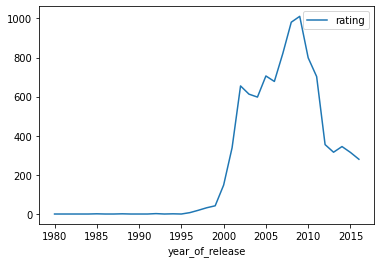

In [13]:
print(data.pivot_table(index='year_of_release' , values='rating', aggfunc='count').plot())
plt.show()

In [14]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


    ESRB была основана в 1994 году, что читается по графику: до 1994 года рейтинги практически отсутствуют.
    Все пропуски в данном столбце уверенно можно заменить на **RP**(в ожидании).

In [15]:
data['rating']= data['rating'].fillna('RP')
data['rating'].value_counts(dropna=False)

RP      6679
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

    Проверим обновленный датасет и перейдем к расчетам:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           16446 non-null  object 
dtypes: float32(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


    Упустила пропуски в столбцах 'name' и 'genre':

In [17]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP


    Комбо: одним кодом вывели пропуски сразу в двух столбцах. 
    Отсутствие 2 строк с почти незаполненными данными не повлияют на ход дальнейшего исследования - удалим.

In [18]:
data.dropna(subset=['name', 'genre'], inplace=True)

Выполним необходимые расчеты:

In [19]:
data['total'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [20]:
data.duplicated().sum()

0

    Явных дубликатов нет

In [21]:
print(data['name'].duplicated().sum())
print(data['name'].value_counts())

5018
Need for Speed: Most Wanted                           12
FIFA 14                                                9
Ratatouille                                            9
LEGO Marvel Super Heroes                               9
Lego Batman 3: Beyond Gotham                           8
                                                      ..
Final Fantasy Tactics: The War of the Lions            1
Dragon Quest: Shounen Yangus to Fushigi no Dungeon     1
Touch 'N' Play Collection                              1
Phineas and Ferb                                       1
RalliSport Challenge 2                                 1
Name: name, Length: 11426, dtype: int64


    В данном столбце дубликаты - это нормально и не нужно их "схлопывать": игра может быть обновлена и совсем необязательно, что производитель в наименовании это как-то укажет(например, Need for Speed: Most Wanted в 2005 и 2012 годах).

    Ошибки в написании я не допускаю, так как это, скорее всего, речь идет о компьютерных играх и скорее всего был подгружен из интернета, ручной набор исключаю.

## Исследовательский анализ

### Динамика выпуска компьютерных игр

    Посмотрим на количество игр, которое выпускалось в разные годы, для этого построим гистограмму:

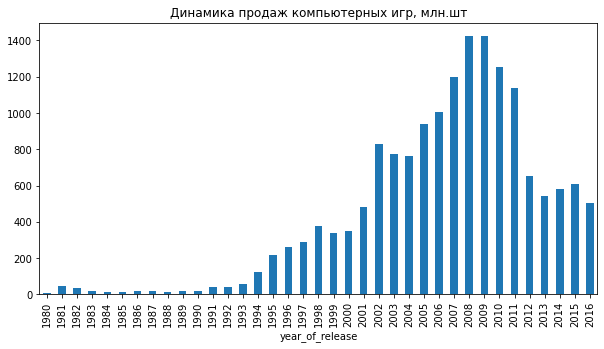

In [22]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(10, 5), legend=None, title='Динамика продаж компьютерных игр, млн.шт')
plt.show()

    На гистограмме видно, как развивались компьютерные игры с 1980 года: от нескольких штук **до пиковых** 1426 в 2008 и 2009 годах. 

In [23]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [24]:
data.groupby('year_of_release')['name'].nunique()


year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

### Анализ динамики продаж в разрезе платформ

    Рассмотрим динамику продаж в разрезе платформ

In [25]:
data_pivot = data.pivot_table(index=['year_of_release', 'platform'], values='total', aggfunc='sum').reset_index()
print(data_pivot)

     year_of_release platform  total
0               1980     2600  11.38
1               1981     2600  35.68
2               1982     2600  28.88
3               1983     2600   5.84
4               1983      NES  10.96
..               ...      ...    ...
233             2016      PSV   4.25
234             2016      Wii   0.18
235             2016     WiiU   4.60
236             2016     X360   1.52
237             2016     XOne  26.15

[238 rows x 3 columns]


In [26]:
data_pivot = data.pivot_table(index=['platform'], values='total', aggfunc='sum').reset_index()
print(data_pivot.sort_values(by='total', ascending=False))

   platform    total
16      PS2  1233.56
28     X360   961.24
17      PS3   931.34
26      Wii   891.18
4        DS   802.78
15       PS   727.58
18      PS4   314.14
6       GBA   312.88
19      PSP   289.53
2       3DS   257.81
13       PC   255.76
5        GB   254.43
29       XB   251.57
11      NES   251.05
10      N64   218.01
23     SNES   200.04
7        GC   196.73
30     XOne   159.32
0      2600    86.48
27     WiiU    82.19
20      PSV    53.81
21      SAT    33.59
8       GEN    28.35
3        DC    15.95
22      SCD     1.86
12       NG     1.44
25       WS     1.42
24     TG16     0.16
1       3DO     0.10
9        GG     0.04
14     PCFX     0.03


    Выделим ТОП платформ с суммарной реализацией более 500 миллионов проданных копий. 
    В **ТОП6** вошли следующие платформы: 'PS2', 'X360', 'PS3', 'WII', 'DS', 'PS'. 

    Создадим список топов и отразим их на графике:

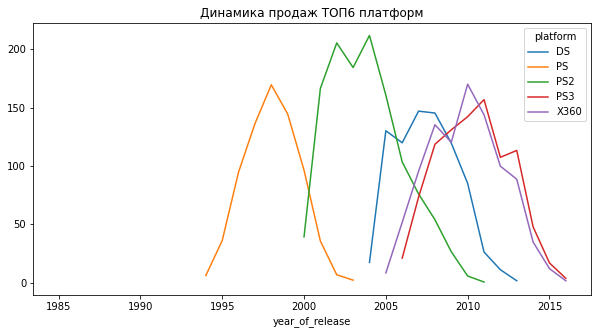

In [27]:
top_pl = ['PS2', 'X360', 'PS3', 'WII', 'DS', 'PS']
data_plot = data[data['platform'].isin(top_pl)].groupby(['year_of_release','platform']).agg(sum=('total','sum')).unstack('platform')
data_plot.columns = data_plot.columns.droplevel(0)
data_plot.plot(figsize=(10, 5), title='Динамика продаж ТОП6 платформ')
plt.show()

    График выше по сути отражает жизненный цикл платформ: можем видеть этап создания/появления на рынке, рост продаж, достижение пикового значения, падение и остановка продаж.

    Жизненный цикл платформ длится около 10 лет, на примере Playstation (3 из 6 платформ уровня ТОП) можно сказать, что чтобы завоевать и удержать рынок необходимо постоянно развиваться, совершенствоваться, что и делала компания Sony: на этапе спада(затухания) PS вводят на рынок новую версию, которая к моменту ухода с рынка версии-предшественника удерживает лидирующее положение в продажах.


In [28]:
data['category'] = data['platform']
duplicates1 = ['3DS','WiiU', 'Wii', 'DS', 'GBA', 'N64', 'SNES', 'NES']
duplicates2 = ['PS3', 'PS4', 'PSV', 'PSP', 'PS', 'PS2']
duplicates3 = ['X360', 'XOne', 'XB']
duplicates4 = ['GC', 'SAT', '2600', 'GB', 'DC', 'GEN', 'NG', 'WS', 'SCD', '3DO', 'TG16', 'PCFX', 'GG', 'PC' ]
data['category'] = data['category'].replace(duplicates1, 'Nintendo')
data['category'] = data['category'].replace(duplicates2, 'PlayStation')
data['category'] = data['category'].replace(duplicates3, 'Xbox')
data['category'] = data['category'].replace(duplicates4, 'other')

print(data['category'].value_counts()) 

PlayStation    6637
Nintendo       5530
Xbox           2282
other          1995
Name: category, dtype: int64


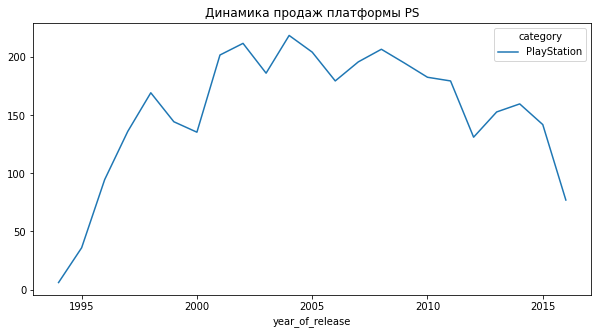

In [29]:
top=['PlayStation']
data_plot = data[data['category'].isin(top)].groupby(['year_of_release','category']).agg(sum=('total','sum')).unstack('category')
data_plot.columns = data_plot.columns.droplevel(0)
data_plot.plot(figsize=(10, 5), title='Динамика продаж платформы PS')
plt.show()

    Пример жизненного цикла платформ  компании Sony, график демонстрирует на стадии зрелости продукта очередной рост продаж за счет ввода новой версии платформы.
    Отличное управление продуктом на рынке.

    Посчитаем средний жизненный цикл для всех платформ:

In [30]:
data.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

    **7.7 лет** - средний жизненный цикл платформ на рынке за весь имеющейся период

### Выделение актуального периода

    Доступный период с 1980 года для дальнейшего анализа нам не понадобится, проанализируем, какой срез данных выделить, чтобы определить **актуальный период**.

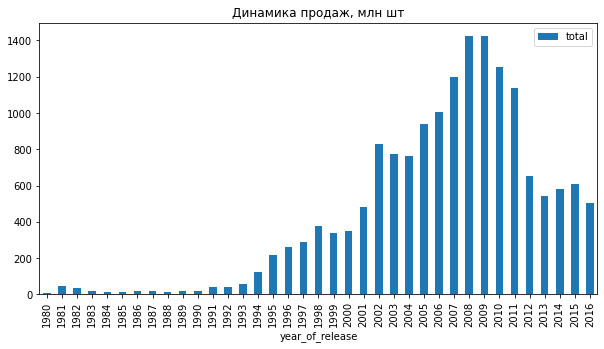

In [31]:
data.pivot_table(index='year_of_release', values='total', aggfunc='count').plot(kind='bar', figsize=(10, 5), title='Динамика продаж, млн шт')
plt.show()

    По графику "Динамика продаж" можно увидеть, как продажи компьютерных игр набирали обороты,   достигли пика в 2008-2009гг и стабилизировались с **2012 года.**
    Посмотрим на количество платформ на рынке в разрезе лет:

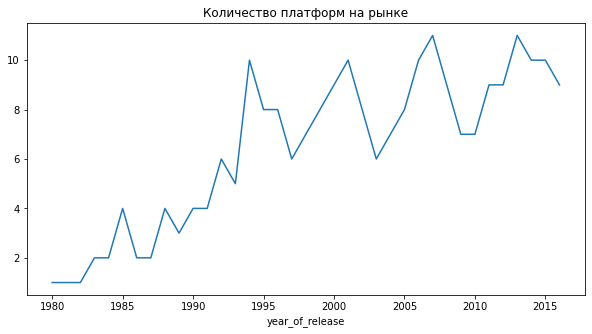

In [32]:
data.groupby('year_of_release')['platform'].nunique().plot(figsize=(10, 5), title='Количество платформ на рынке')
plt.show()

    Не самый показательный график, более информативным было бы распределение по собственникам платформ, а данный график искажают выпуски обновленных версий платформ и сделать вывод о том, что рынок игроков устоявшийся пока сложно.

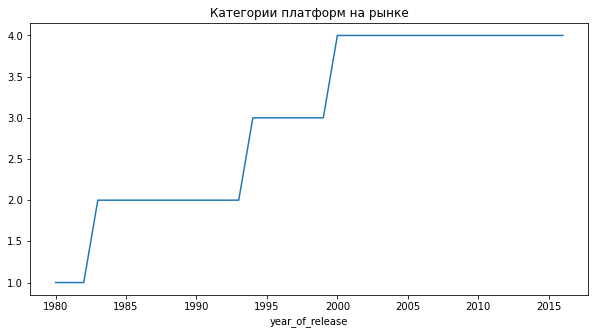

In [33]:
data.groupby('year_of_release')['category'].nunique().plot(figsize=(10, 5), title='Категории платформ на рынке')
plt.show()

In [34]:
data.groupby('year_of_release')['platform'].unique()

year_of_release
1980                                               [2600]
1981                                               [2600]
1982                                               [2600]
1983                                          [NES, 2600]
1984                                          [NES, 2600]
1985                                  [NES, 2600, PC, DS]
1986                                          [NES, 2600]
1987                                          [NES, 2600]
1988                                  [NES, GB, 2600, PC]
1989                                      [GB, NES, 2600]
1990                                 [SNES, NES, GB, GEN]
1991                                 [SNES, GEN, GB, NES]
1992                         [GB, SNES, GEN, PC, NES, GG]
1993                            [SNES, NES, SCD, GEN, NG]
1994      [SNES, GB, PC, GEN, PS, SAT, NG, SCD, NES, 3DO]
1995               [SNES, PC, PS, GB, SAT, NG, TG16, 3DO]
1996               [GB, N64, PS, PC, SNES, SAT, NG, PCFX

    Обобщенная группа "other" нивелирует количество платформ на рынке, но можно утверждать, что на рынке компьютерных игр имеется **3 основных игрока.**
    Рассмотрим динамику продаж компьютерных игр в разрезе регионов и их распределение по годам:

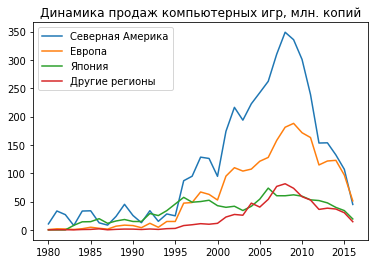

In [35]:
plt.plot(data['na_sales'].groupby(data['year_of_release']).sum(),  label='Северная Америка')
plt.plot(data['eu_sales'].groupby(data['year_of_release']).sum(), label='Европа')
plt.plot(data['jp_sales'].groupby(data['year_of_release']).sum(), label='Япония')
plt.plot(data['other_sales'].groupby(data['year_of_release']).sum(), label='Другие регионы')
plt.title('Динамика продаж компьютерных игр, млн. копий')
plt.legend()
plt.show()

    Наиболее стабильным и легкопрогнозируемым является рынок Японии, в то время как динамика по рынку Северной Америки свалилось в пике.
    Думаю, что такой обвал рынка сбыта в Северной Америке напрямую связан с финансовым кризисом в 2008году.

    Такие факторы, как старт продаж, пиковый период, мировой кризис, для построения прогнозов 2017 года необходимо убрать.

    На своей практике я не встречала необходимость брать в работу массив с большим отрезком времени, тем более рынок компьютерных игр достаточно динамичный (возрастают потребности пользоватлей, улучшаются технические возможности, недремлющая конкуренция), считаю верным обозначить за **актуальный период** последние 3 года.

С учетом того, что я не вижу насколько полный 2016 год, сформируем массив данных с 2013года:

In [36]:
data_new = data[data['year_of_release'] >= 2013]

### Анализ динамики продаж компьютерных игр в разрезе платформ

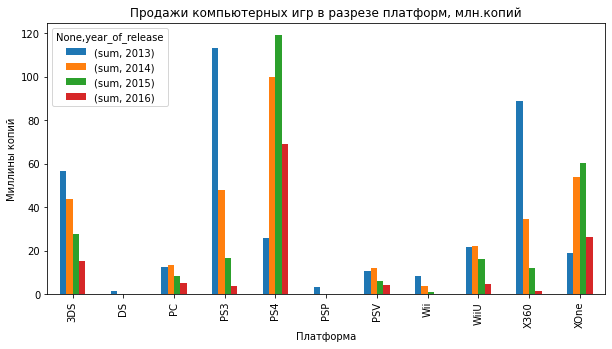

In [37]:
data_new.pivot_table(index ='platform', columns = 'year_of_release', values = 'total', aggfunc=['sum']).plot(
    kind='bar',
    xlabel='Платформа',
    ylabel='Миллины копий',
    title ='Продажи компьютерных игр в разрезе платформ, млн.копий',
    legend=True,
    figsize=(10, 5))
plt.show()

    Playstation - в топе во все годы выбранного периода, вот что значит успех на рынке продаж.
    Также на графике видим как, на первый взгляд, исчезают с рынка: PC, PSP, PSV, Wii, WiiU, но, если быть глубокопогруженному человеку в рынок компьютерных игр, то видно как старая версия сменяется новой.

In [38]:
print(data_new['platform'].unique())

['PS3' 'X360' 'PS4' '3DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'DS' 'PSP']


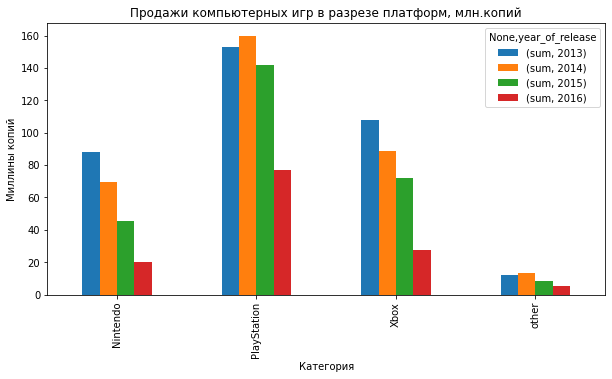

In [39]:
data_new.pivot_table(index ='category', columns = 'year_of_release', values = 'total', aggfunc=['sum']).plot(
    kind='bar',
    xlabel='Категория',
    ylabel='Миллины копий',
    title ='Продажи компьютерных игр в разрезе платформ, млн.копий',
    legend=True,
    figsize=(10, 5))
plt.show()

По сути рынок компьютерных игр в период с 2013 по 2016гг делят два игрока: PlayStation и Xbox.

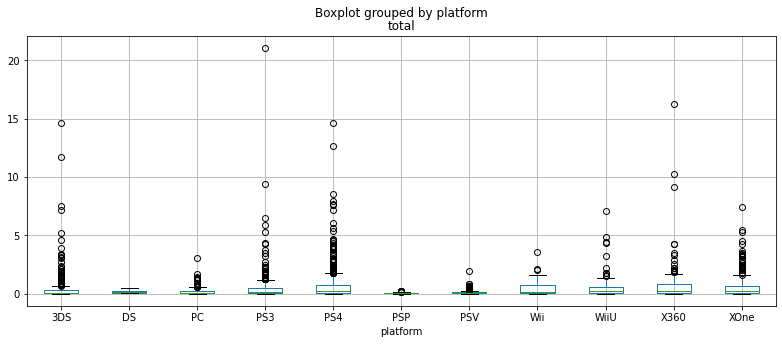

In [40]:
data_new.boxplot('total', by = 'platform', figsize = (13,5))
plt.show()

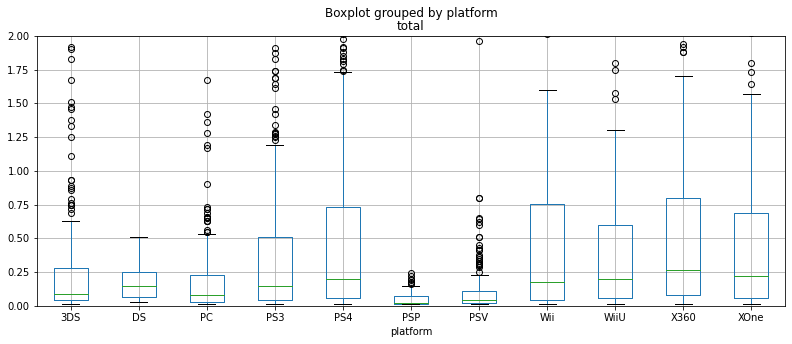

In [41]:
data_new.boxplot('total', by = 'platform', figsize = (13,5)).set_ylim(0,2)
plt.show()

    На графике отображено распределение продаж игр по каждой платформе. По некоторым из них видны выбросы.

    Посмотрим, как будет выглядеть график в укрупненном виде - по категориям

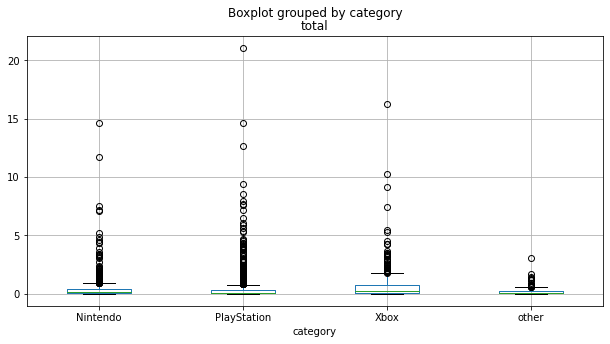

In [42]:
data_new.boxplot('total', by = 'category', figsize = (10,5))
plt.show()

    Также как и на предыдущем графике

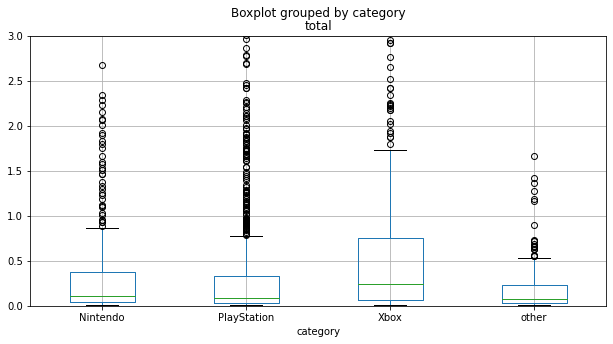

In [43]:
data_new.boxplot('total', by = 'category', figsize = (10,5)).set_ylim(0,3)
plt.show()

    На платформе PlayStation самые высокие суммарные продажи компьютерных игр.

### Анализ влияния на продажи компьютерных игр отзывов критиков и пользователей

    Посмотрим влияние отзывов пользователей и критиков на продажи платформы PS.

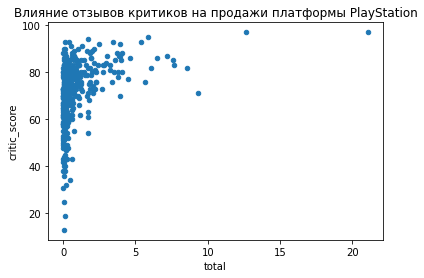

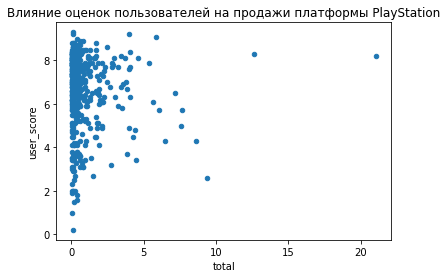

In [44]:
ax = data_new.query('category == "PlayStation"').plot(kind='scatter', x ='total', y ='critic_score')

ax.set_title('Влияние отзывов критиков на продажи платформы PlayStation')
ax.set_xlabel('total')
ax.set_ylabel('critic_score')

plt.show()

ax = data_new.query('category == "PlayStation"').plot(kind='scatter', x ='total', y ='user_score')

ax.set_title('Влияние оценок пользователей на продажи платформы PlayStation')
ax.set_xlabel('total')
ax.set_ylabel('user_score')

plt.show()

    Построим диаграмму рассеивания на платформу, которая была на рынке в течение всего исследуемого актуального периода, это PS4:

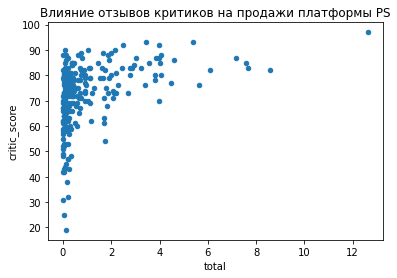

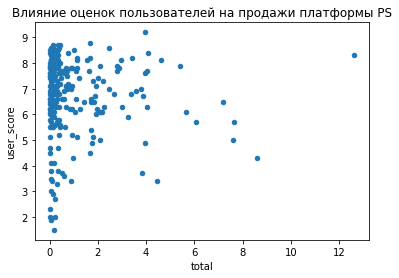

In [45]:
ax = data_new.query('platform == "PS4"').plot(kind='scatter', x ='total', y ='critic_score')

ax.set_title('Влияние отзывов критиков на продажи платформы PS')
ax.set_xlabel('total')
ax.set_ylabel('critic_score')

plt.show()

ax = data_new.query('platform == "PS4"').plot(kind='scatter', x ='total', y ='user_score')

ax.set_title('Влияние оценок пользователей на продажи платформы PS')
ax.set_xlabel('total')
ax.set_ylabel('user_score')

plt.show()

    Диаграммы рассеяния, что в разрезе конкретной платформы, что в целом по категории PS, визуально похожи.
    Точки формируют почти что вертикальную прямую, можно сделать предварительный вывод, что **корреляции нет либо очень слабая.**

    Чтобы отцифровать зависимость, предлагаю посмотреть на коэффициенты корреляции:

In [46]:
print('Корреляция между отзывами критиков и продажами категории PlayStation', data_new.query('category == "PlayStation"')['total'].corr(data_new.query('category == "PlayStation"')['critic_score']))
print('Корреляция между отзывами пользователей и продажами категории PlayStation', data_new.query('category == "PlayStation"')['total'].corr(data_new.query('category == "PlayStation"')['user_score']))

print('Корреляция между отзывами критиков и продажами платформы PS4', data_new.query('platform == "PS4"')['total'].corr(data_new.query('platform == "PS4"')['critic_score']))
print('Корреляция между отзывами пользователей и продажами платформы PS4', data_new.query('platform == "PS4"')['total'].corr(data_new.query('platform == "PS4"')['user_score']))

Корреляция между отзывами критиков и продажами категории PlayStation 0.35295546927281773
Корреляция между отзывами пользователей и продажами категории PlayStation -0.04758367942637424
Корреляция между отзывами критиков и продажами платформы PS4 0.406567902061781
Корреляция между отзывами пользователей и продажами платформы PS4 -0.031957109005188264


    Что в целом по категории, что в разрезе конкретной платформы связь с оценками критиков **слабая.**  Оценка критиков в какой-то мере влияет на продажи: перед выходом в релиз издательство дает версию игры журналистам, чтобы те в свою очередь ознакомились, написали рецензию. 

    Связи между продажами и оценками пользователей - **нет.** 

    Чтобы убедиться о правильности выводов о зависимости между оценками посмотрим на коэффициенты корреляции по всем категориям.

In [47]:
data_new.groupby('category')[['critic_score','user_score']].corrwith(data_new['total'])

,critic_score,user_score
category,,
Nintendo,0.372348,0.296239
PlayStation,0.352955,-0.047584
Xbox,0.349277,-0.037778
other,0.196030,-0.093842


    Получили подтверждение о слабой взаимосвязи с оценками критиков и пользователей.
    Проверим распределение оценок:

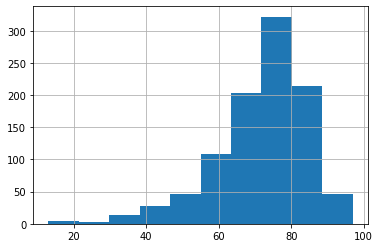

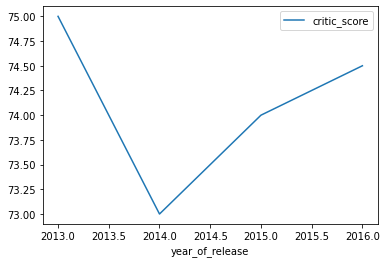

In [48]:
data_new['critic_score'].hist()

data_pivot = data_new.pivot_table(index='year_of_release', values='critic_score', aggfunc='median')
data_pivot.plot(y='critic_score')
plt.show()

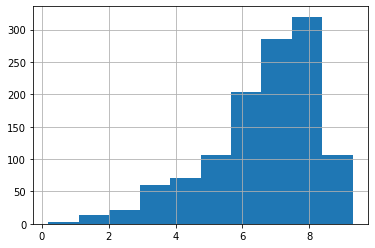

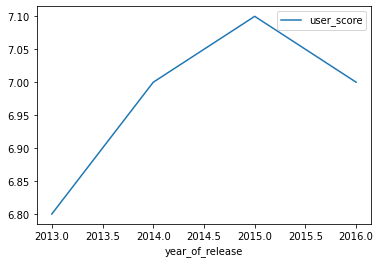

In [49]:
data_new['user_score'].hist()
data_pivot = data_new.pivot_table(index='year_of_release', values='user_score', aggfunc='median')
data_pivot.plot(y='user_score')
plt.show()

    Из описанных выше данных можно сделать вывод, что оценки **перестали быть объективными.** это касается как оценок критиков, так и пользователей.

    Поэтому и при анализе показало низкую взаимосвязь между этими факторами и продажами платформ.
    В интернете нашла отличную картинку, которая отражает суть:

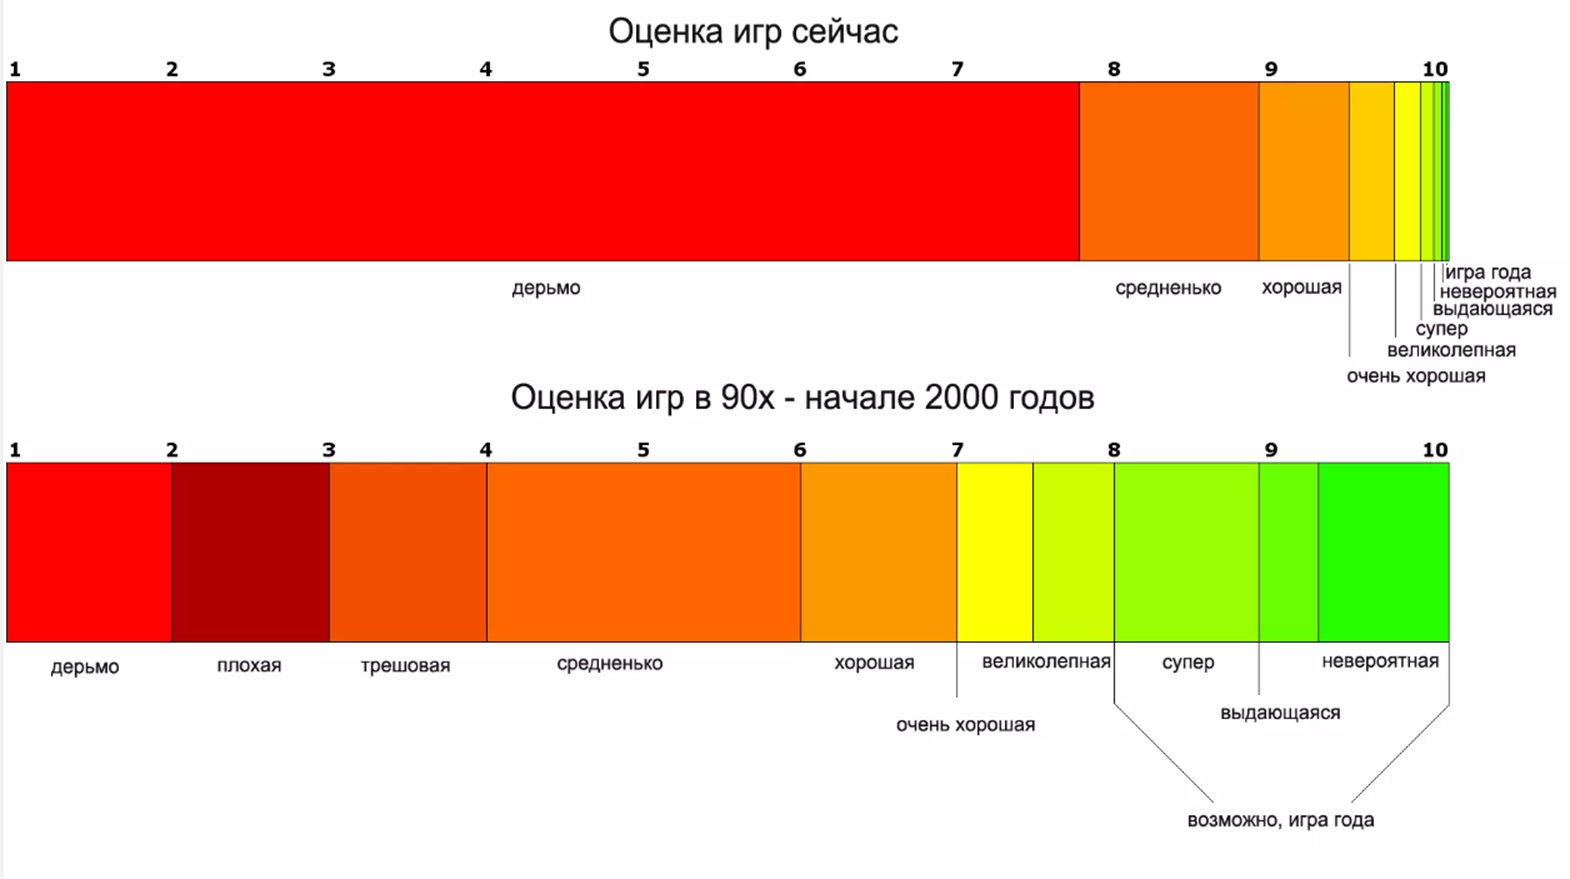

### Анализ компьютерных игр в разрезе жанров

    Рассмотрим распределение компьютерных игр по **жанрам**.
    Чтобы выделить наиболее прибыльные, следует запросить информацию **о сумме сделок,** так как в датасете присутствуют только миллионы проданных копий.

    Прибыльные жанры - это те, у которых выше сумма *разовой* сделки, посмотрим в разрезе имеющихся данных:

In [50]:
data_new.pivot_table(index='genre', values ='total', aggfunc=(['sum','count','mean','median',])).droplevel(level=1, axis=1).sort_values(by ='median', ascending = False)

,sum,count,mean,median
genre,,,,
Shooter,232.98,187,1.245882,0.450
Sports,150.65,214,0.703972,0.240
Platform,42.63,74,0.576081,0.225
Role-Playing,145.89,292,0.499623,0.125
Fighting,35.31,80,0.441375,0.125
Racing,39.89,85,0.469294,0.120
Action,321.87,766,0.420196,0.110
Simulation,21.76,62,0.350968,0.100
Misc,62.82,155,0.405290,0.100


    По медианному и среднему значению можно выделить ТОП3 жанров: Shooter, Sports, Platform.
    Это хорошо будет видно на графике 'ящик с усами'.

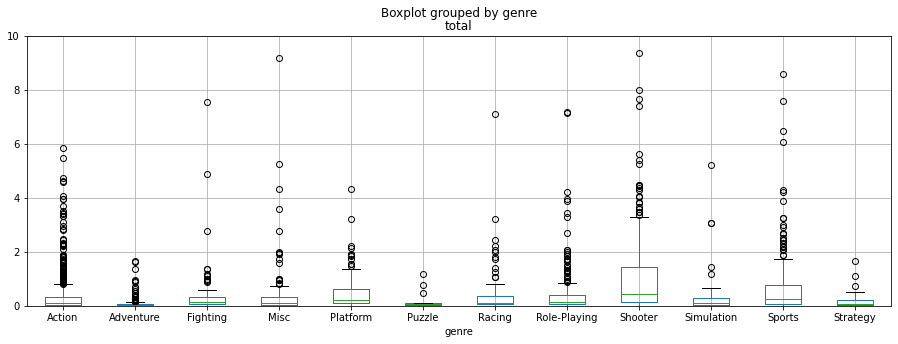

In [51]:
data_new.boxplot('total', by = 'genre', figsize = (15,5)).set_ylim(0,10)
plt.show()

    Жанр Shooter: среднее значение 1,25, медианное - 0,45млн копий (в три раза ниже). Такая большая разница может говорить о том, что есть игры в этой категории жанров, которые принимают большое значение (если бы это были данные в денежном выражении, я бы написала, что есть очень высокодоходные игры).

    Жанр Sports: значение среднего и медианы различаются в три раза. 
    Жанр Platform: среднее значение равно 0,58, медианное - 0,23.
    Если говорить о всех жанрах, то по каждой категории среднее значение больше медианного в ≈3 раза.
    По 3 жанрам особо картина на нарисуется, поэтому в дальнейшем анализе дополнительно будут участвовать "Action", "Role-Playing".

    Самые низкие медианные продажи имеют жанры:  Adventure  - занял бы лидирующее место по количеству наименований(245), но в сумме дают небольшое значение, (если говорить о денежном выражении, то это были бы самые дешевые игры).
    Жанр Puzzle - имеет самый низкий показатель в суммарных продажах.

## Составление портрета пользователя каждого региона

    Выделим самые популярные платформы (топ-5) в разрезе регионов:

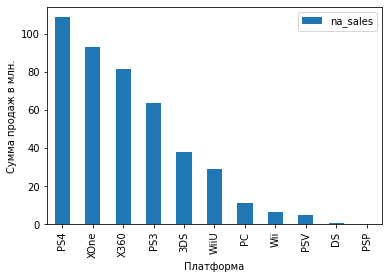

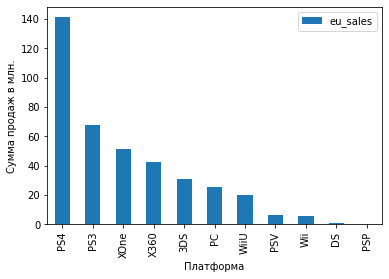

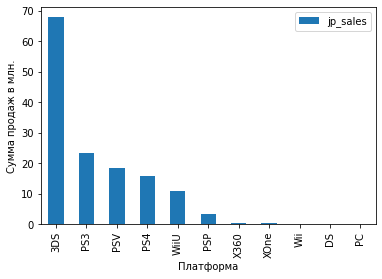

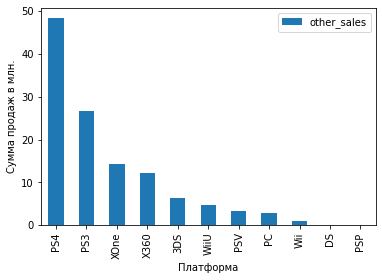

In [52]:
sales_reg = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for i in sales_reg :
    data_new.pivot_table(index='platform', values=i, aggfunc='sum').sort_values(by=i, ascending=False).plot(
    kind='bar',
    xlabel='Платформа',
    ylabel='Cумма продаж в млн.',
    label=i, 
    legend=True)

    Из всех регионов выделяется компьютерный рынок Японии. Рассмотрим подробнее:

    ТОП5 платформ для регионов:
        PS4, XOne, X360, PS3, 3DS - Северная Америка;
        PS4, PS3, XOne, X360 и 3DS - Европа; PS- имеет большой отрыв по сравнению с конкурентами.
        3DS, PS3, PSV, PS4 и WiiU - Япония;
        PS4, PS3, XOne, X360 и 3DS - другие страны

    PS4 является лидером европейского, американского рынков.
    Нельзя не отметить, что в Японии безоговорочным лидером является платформа, выпущенная японской компанией **Nintendo.** Япония выделяется среди всех регионов: персонажи (стоит ли упоминать аниме?, и всякие ми-ми-ми-шные няши), высокий уровень сервиса во всем, менталитет. 
    Японцы - это другая целевая аудитория, отличная от американской или европейской, думаю не все крупные производители хотят завоевать японский рынок, возможно не так рентабельно выпускать специфический продукт.

    Вырисовывается ситуация по распределению рынков сбыта игровых платформ. Продолжим анализировать в разрезе категорий, чтобы лучше понять мотивацию и стратегии развития каждой компании:

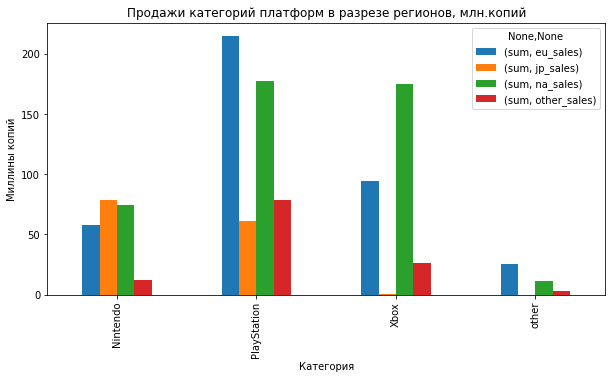

In [53]:
data_new.pivot_table(index ='category', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum']).plot(
    kind='bar',
    xlabel='Категория',
    ylabel='Миллины копий',
    title ='Продажи категорий платформ в разрезе регионов, млн.копий',
    legend=True,
    figsize=(10, 5))
plt.show()

    Xbox на японском рынке практически не представлена.
    Посмотрим распределение по жанрам:

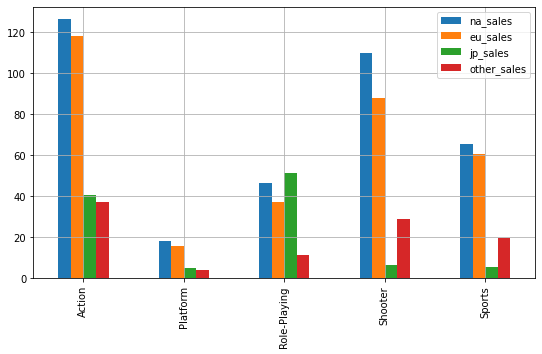

In [54]:
region = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data_new.query('genre == ["Shooter", "Platform", "Sports", "Action", "Role-Playing"]').groupby('genre').sum().plot(
    kind='bar',
    y=region,
    xlabel='',
    ylabel='',
    legend=True,
    grid=True,
    figsize=(9,5)
)
plt.show()

    Жанровые вкусы у американского и европейского рынков очень похожи. 
    Также видно, что насколько предпочтения потребителей японского рынка отличается от остальных.

### Анализ влияния рейтинга ESRB на продажи

    Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе

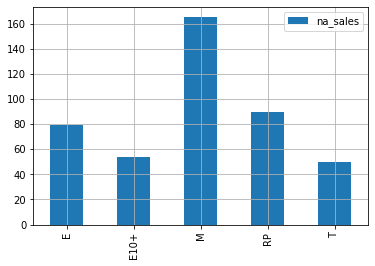

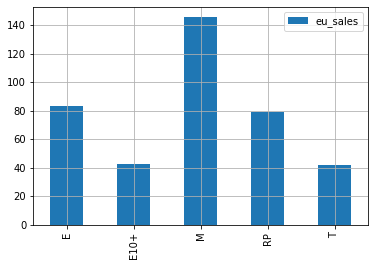

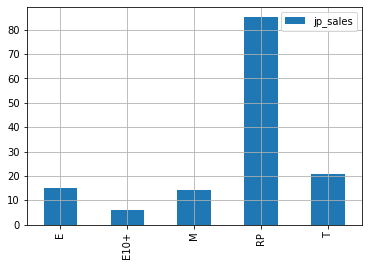

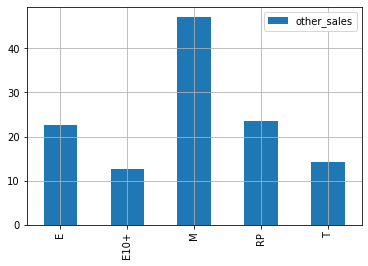

In [55]:
for i in region:
    data_new.groupby('rating')[i].sum().plot(
        kind='bar',
        xlabel='',
        ylabel='',
        label=i, 
        legend=True,
        grid=True,
    )
    plt.show()

    Лидирующее место на всех, кроме японском, рынках занимает рейтинг ESRB **М,** по сути это и есть целевая аудитория, на которую направлено большинство компьютерных игр (старше 17 лет).

    На японском рынке бОльшую долю занимает рейтинг RP (в ожидании). С учетом того, что на этапе предобработки мы заполнили пропуски значением RP,  можно предположить, что в Япония имеет свои местные рейтинги 

    Запрос в поисковике данное предположение подтвердил: возрастными рейтингами для консольных игр в Японии занимается компания CERO. 

    На основании проведенного анализа можно составить портрет пользователя по кажому региону:
пользователей из регионов Северной Америки и Европы можно объединить в единую и описать их как: **пользователь старше 17 лет, предпочитающий игры в жанре Action и Shooter и пользующийся преимущественно платформой PS и Xbox.**
    Чтобы описать портрет пользователя из Японии необходимо дополнить имеющийся датасет, по тому что есть это **пользователь платформы Nintendo и предпочитающий жанры Role-Playing и Platform.** Уверена, что при более полных данных будут внесены и правки к данному описанию.

##  Проверка гипотез

### Критический уровень значимости

In [56]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float32
 10  rating           2233 non-null   object 
 11  total            2233 non-null   float64
 12  category         2233 non-null   object 
dtypes: float32(1), float64(6), int64(1), object(5)
memory usage: 300.1+ KB


    Для проверки гипотез понадобится показатель "alpha" - критический уровень значимости. 
    Данный показатель устанавливается исследователем, т.е. нами.
**alpha = 0.001**

    Таким уровнем руководствовалась в первую очередь размером имеющейся выборки, а она у нас в 2233 строки. Она у нас достаточно большая, поэтому уверенно отвергать нулевую гипотезу можно только при значимости меньшей 0,001.

### Гипотеза №1

    Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    Н1: Средние пользовательские рейтинги платформ Xbox One отличаются от рейтинга платформы PC

In [57]:
data_hypothesis = data_new.dropna(subset=['user_score'])

xbox = data_hypothesis[data_hypothesis['platform']=='XOne']['user_score']
pc = data_hypothesis[data_hypothesis['platform']=='PC']['user_score']

alpha = 0.001 

results = st.ttest_ind(
    xbox, 
    pc, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One отличаются от рейтинга платформы PC")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые") 

p-значение:  0.147597032047728
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые


### Гипотеза №2

    Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
    Н1: Средние пользовательские рейтинги жанров Action и Sports разные

In [58]:
action = data_hypothesis[data_hypothesis['genre']=='Action']['user_score']
sports = data_hypothesis[data_hypothesis['genre']=='Sports']['user_score']

alpha = 0.001 

results = st.ttest_ind(
    action, 
    sports, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые") 

p-значение:  1.4459989209941613e-20
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные


## Общий вывод

    Для выполнения проектной работы были получены данные интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
    Стояла задача выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

    Работа была выполнена в несколько этапов:
    На первом этапе изучили предоставленный датасет.
    На втором этапе была проведена подготовительная работа с данными, а именно: приведены наименования к одному виду, проработаны пропуски, дополнен датасет расчетными данными.
    На третьем этапе был выполнен исследовательский анализ:
    - проанализирован период продаж;
    - изучены платформы компьютерных игр и их жизненный цикл;
    - выделен актуальный период (2013-2016гг) для дальнейшего хода исследования;
    - выделен ТОП платформ по продажам;
    - изучено влияние отзывов критиков и пользователей на продажи;
    - выделен ТОП жанров компьютерных игр.
    На четвертом этапе был составлен портрет пользователя в разрезе регионов, целевая аудитория магазина. Даны рекомендации.
    Пятый этап состоял из формулироки гипотез и их проверки:
     - не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
     - отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные

    Рекомендации:
    1. Валообразующие платформы - PS и Xbox (следить за выходом обновлений версий и своевременно внедрять в матрицу продаж);
    2. Обратить внимание на японский рынок компьютерных игр (оценить рентабельность выхода/завоевания совершенно не похожего на европейский и американский рынки);
    3. Так как целевая аудитория - подростки, то необходимо следить за тенденциями и не отставать от них (как в техническом вопросе, так и появлении новых персонажей, выход рейтинговых фильмов);
    4. Вернуть объективность оценкам критиков: это более глобальный вопрос, чем для одного интернет-магазина, но все-таки важный и значимый.
 